<a href="https://colab.research.google.com/github/Raman-kr1/AMEX-Campus-challenge-2024/blob/main/Confusion_matrix_3raman_r3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   unique_identifier  risk_score_2  risk_score_3  risk_score_5  risk_score_7  \
0             106491       0.26372             2            98           392   
1             123317       0.03074             1            68           413   
2             105861       0.22262            81            98           471   
3             104945       0.24327            67            35           453   
4             100794       0.15370            15            57           335   

   return_payments  merchant1_amt  default_ind  
0                0        1550.27            0  
1                0         175.00            0  
2                0         311.94            0  
3             2305        1322.73            0  
4                0        1350.00            0  


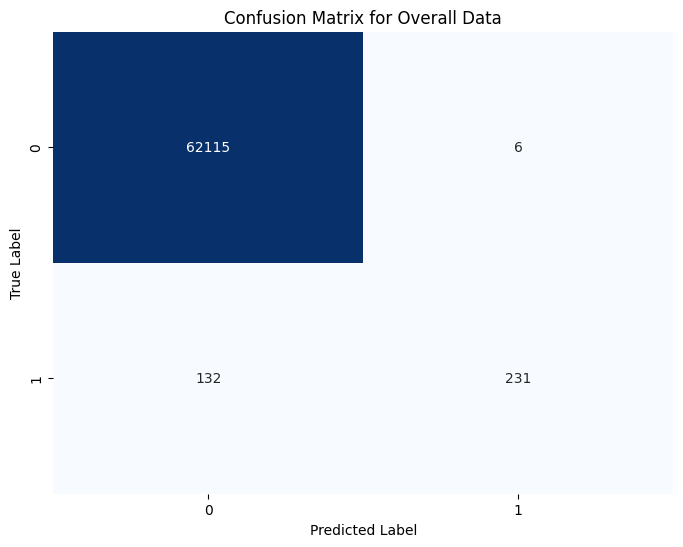

Accuracy: 0.9978
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62121
           1       0.97      0.64      0.77       363

    accuracy                           1.00     62484
   macro avg       0.99      0.82      0.88     62484
weighted avg       1.00      1.00      1.00     62484

Predictions have been added to the dataset and saved to 'amex_data_with_predictions.xlsx'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('/content/6var.xlsx')
print(df.head())

# Prepare features and labels
# Drop unnecessary columns
columns_to_drop = ['unique_identifier']  # Replace with your actual column names
X = df.drop(columns=['default_ind'] + columns_to_drop)
y = df['default_ind']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Combine predictions and true labels
all_y = np.concatenate([y_train, y_test])
all_y_pred = np.concatenate([y_train_pred, y_test_pred])

# Compute the confusion matrix for the overall data
cm = confusion_matrix(all_y, all_y_pred)

# Create a DataFrame for easier plotting with seaborn
cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Overall Data')
plt.show()

# Calculate precision, accuracy, and recall
accuracy = accuracy_score(all_y, all_y_pred)
classification_rep = classification_report(all_y, all_y_pred, target_names=['0', '1'])

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_rep)

# Make predictions on the entire dataset
X_full = scaler.transform(X)  # Scale the entire dataset
df['predictions'] = model.predict(X_full)  # Add predictions to the DataFrame

# Save the DataFrame with predictions to a new Excel file
df.to_excel('/content/amex_data_with_predictions.xlsx', index=False)

print("Predictions have been added to the dataset and saved to 'amex_data_with_predictions.xlsx'.")
